# DEF-D Kick off dag: test notebook
Dit notebook is bedoeld om te testen of je deze repository kan forken en hoe je werkt met GitHub, Ook testen we of de functies die we bij DEF gebruiken goed werken. Doe de volgende dingen:

- Fork deze repository naar je eigen GitHub account: dit staat [hier](https://design-engineering-voor-fysici.github.io/Design-Engineering-voor-Fysici-Dictaat/main/GitExtra/0GitIntro.html) uitgelegd. Lees het GitHub stukje minimaal nu al 1 keer door.
- Maak een branch aan voor de kickoff opdracht, en werk in deze branch.
- Open dit notebook op je eigen computer (via Anaconda -> Jupyterhub, of via VSC, of welke editor je zelf wilt)
- Lees de instructies in de volgende cellen goed en voer deze uit.
- Als je alle cells in dit notebook hebt gerund, klik je vervolgens in het menu op ```kernel --> restart & run all``` boven in je scherm. Als je hele notebook doorgerekend is, controleer dan of alles goed staat.
- Maak een pull request aan. Zorg dat je je TA uitnodigt als reviewer en zet de link van de pull request in de juiste assignment op Brightspace!
- Als je helemaal klaar bent kan je de software die we bij DEF gebruiken gaan installeren: volg op Brightspace de link naar de opdracht. Deze kan je vinden bij ```content --> ontwerpopdrachten --> kick off dag --> software installeren```

Je kan altijd je notebook tijdelijk opslaan (save icoon of ```file --> save``` of `ctrl + s`). Je kan ook tussendoor commits maken!


## Persoonlijke informatie en grafiek

In deze eerste cel vul je jouw naam en studienummer in. Je kan een tekst-cel aanpassen door erop te dubbelklikken. Je ziet de tekst dan in ```markdown```: dat is een computertaal die gebruikt wordt om teksten op te maken (vergelijkbaar, maar niet helemaal, zoals $\LaTeX$). Je kan, zoals je hiervoor ziet, ook $\LaTeX$ gebruiken door je code tussen dollar tekens te zetten. Als je meer over markdown wilt leren: [google](https://www.google.com/search?q=markdown).

Als je klaar bent met editen zet je de tekst terug naar mooi opgemaakte tekst door op ```Cell --> run cells``` te klikken, of op het play icoontje, of door de toetsencombinate shift-enter te gebruiken. (Tip: er zijn nog meer handige toetsencombinaties)

### Opdracht
Vervang in onderstaande tabel ```student naam 1``` door jouw naam en ```student studienummer 1``` door jouw studienummer. Vervang vervolgens de gegeven formule door jouw favoriete natuurkundige formule en vervang ook de tekst eronder zodat deze bij jouw formule klopt.


| naam          | studienummer |
| :-------------|:-------------|
| Jinzhou Mo| 6126537 |

Favoriete natuurkundige formule:

$E$

Dit is de formule voor de geostationaire baan van een willekeurig hemellichaam waarbij 

- $E$: De totale energie van een systeem
- $m$: De totale massa van een systeem
- $c$: De snelheid van de licht

is.


## Foto's uploaden
Het zal bij DEF regelmatig gebeuren dat je een foto moet uploaden binnen jouw notebook. Je gaat namelijk dingen maken en we willen dat je vastlegt wat je gemaakt hebt.

Tijdens het introductiecollege vanochtend heb je als het goed is een foto van jouw LEGO eendje gemaakt. Die gaan we uploaden. Zet eerst de foto van jouw telefoon op jouw computer. Hoe dat gaat, zal afhangen van jouw computer en telefoon. Waarschuwing: als je de foto via Whatsapp verstuurt naar jezelf zal deze gecomprimeerd (kleiner gemaakt) worden. Dat hoeft geen probleem te zijn, maar soms gaat daardoor detail verloren. Om de foto in GitHub beschikbaar te maken moet je volgende stappen doorlopen:

- Aan de linkerkant van het scherm zie je als het goed is de inhoud van de map waar dit notebook in staat. 
- Voeg jouw foto toe in de juiste map/folder.
- Je foto zou nu ook in de map moeten staan, controleer dat! 
- Als het fotobestand een lange naam heeft, is dat lastig. Verander de naam in iets korts en logisch door rechtermuisknop te klikken op je foto en vervolgens op ```rename```. Voer een goede naam in.
- Ga nu terug naar dit notebook. Omdat de foto nu in dezelfde map staat als dit notebook kan je daar direct naar verwijzen. Vervang in onderstaande cel de bestandsnaam van het TU Delft logo met de bestandsnaam van de foto van je eendje.



### Opdracht : Voeg hier een foto van jouw eendje in.
Upload de afbeelding in de map waar dit notebook staat en verander hieronder de naam van de file.
 ![Alt](TU_P2_rgb.png "Eend")

 Ik heb geen foto gemaakt

## Berekening en grafiek maken

Vaak zal je bij DEF berekeningen nodig hebben tijdens jouw ontwerp: hoe groot kan iets maximaal worden? Bij welke spanning is mijn apparaat nog veilig? Hieronder staat een (Python) tabel met meetgegevens van een elektrische afstand meter. Dit apparaat meet de afstand tussen twee punten en geeft een voltage als output. De onzekerheid van de voltage-meting is $0.1$ Volt en de onzekerheid in de afstand is vijf procent van de gemeten waarde.

### Opdracht

In onderstaande python cell staan de bovengenoemde meetgegevens. Voeg Python code toe om een grafiek te plotten. Gebruik daarbij alles wat je over correct plotten van grafieken geleerd hebt bij het natuurkundig practicum (denk hierbij aan correcte labels op de assen, correcte type as, legenda, onzekerheid laten zien, etc.) **Voeg ook een 'best fit' lijn toe.**

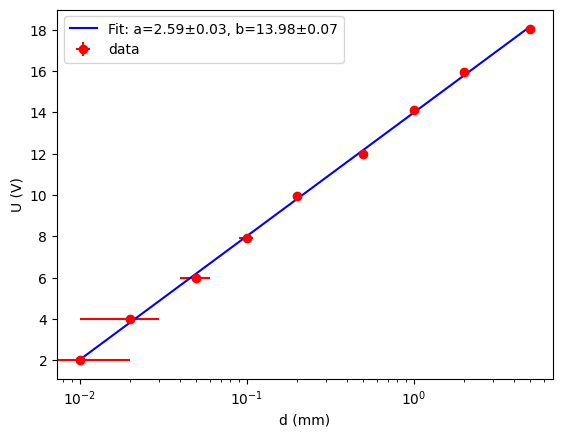

In [ ]:
# Importeren van numpy en matplotlib library
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Meetgegevens: afstand in millimeter, spanning in Volt
afstand = np.array([0.01,0.02,0.05,0.1,0.2,0.5,1.0,2.0,5.0]) 
spanning = np.array([2.01868928,4.01442631,5.99586649,7.91166258,9.96850493,11.96229652
                     ,14.1133456,15.93947672,18.04932637])

# Vul hieronder je eigen code aan om de grafiek te maken. Vergeet niet ook de onzekerheid en de fit!
def func(x, a, b):
    return a * np.log(x) + b
val, cov = curve_fit(func, afstand, spanning)
a, b = val
da, db = np.sqrt(np.diag(cov))

dx = 0.01 * afstand
dy = 0.02 * spanning

plt.figure()
plt.errorbar(afstand, spanning, yerr=dy, xerr=dx, fmt='o', color='red', label='data')
x_fit = np.linspace(min(afstand), max(afstand), 100)
y_fit = func(x_fit, a, b)
plt.plot(x_fit, y_fit, label='Fit: a={:.2f}±{:.2f}, b={:.2f}±{:.2f}'.format(a, da, b, db), color='blue')
plt.xscale('log')
plt.xlabel('d (mm)')
plt.ylabel('U (V)')
plt.legend()
plt.show()



## Pushen

Controleer eerst nog goed of alles klopt. **Klik boven op `Kernel -> Restart and Run all` en check of er geen errors zijn**. Zorg dat alle benodigde bestanden zijn geüpload in de juiste map en dat de afbeeldingen zichtbaar zijn in het notebook. Je kan nu jouw notebook opslaan, comitten en pushen naar de juiste branch! Maak dan de pull request aan en dan:

Kan je de software die we bij DEF gebruiken gaan installeren: volg op Brightspace de link naar de opdracht. Deze kan je vinden bij ```content --> ontwerpopdrachten --> kick off dag --> software installeren```

